In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score,root_mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
X,y = load_diabetes(return_X_y=True)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(f'The r2_score is {r2_score(y_test,y_pred)}')
print(f'The RMSE is {root_mean_squared_error(y_test,y_pred)}')

The r2_score is 0.4399338661568968
The RMSE is 55.627840795469155


In [6]:
# now apply ridge

In [7]:
rlr = Ridge(alpha = 1)
rlr.fit(X_train,y_train)
y_pred = rlr.predict(X_test)
print(f'The r2_score is {r2_score(y_test,y_pred)}')
print(f'The RMSE is {root_mean_squared_error(y_test,y_pred)}')

The r2_score is 0.4078252224517156
The RMSE is 57.200193716870565


In [8]:
# actually here our ridge is not performing well because our data has not noise or muliticoliinearity

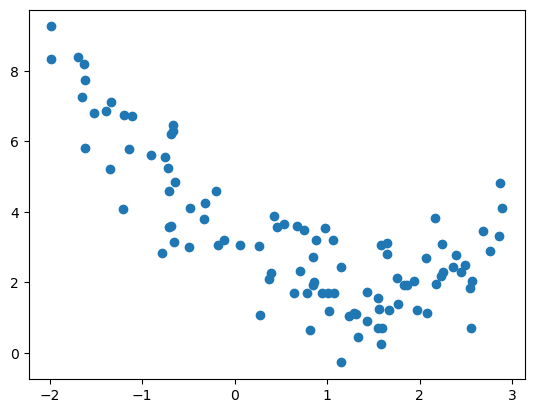

In [9]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [10]:
# now for this dataset
X_train,X_test,y_train,y_test = train_test_split(x1,x2,test_size=0.2,random_state=2)

In [11]:
poly = PolynomialFeatures(degree=15)
X_train_tr1 = poly.fit_transform(X_train)
X_test_tr1 = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_tr1,y_train)
y_pred = lr.predict(X_test_tr1)
print(f'The r2_score is {r2_score(y_test,y_pred)}')
print(f'The RMSE is {root_mean_squared_error(y_test,y_pred)}')

The r2_score is 0.7383221606855259
The RMSE is 1.1166217622639247


In [12]:
poly = PolynomialFeatures(degree=15)
X_train_tr2 = poly.fit_transform(X_train)
X_test_tr2 = poly.transform(X_test)

rlr = Ridge(alpha = 1)
rlr.fit(X_train_tr2,y_train)
y_pred = rlr.predict(X_test_tr2)
print(f'The r2_score is {r2_score(y_test,y_pred)}')
print(f'The RMSE is {root_mean_squared_error(y_test,y_pred)}')

The r2_score is 0.7316032122589928
The RMSE is 1.1308663255576843


In [13]:
# let's create our own class of ridge

In [14]:
class YRedge:
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.b = None
        self.m = None
    def fit(self,X_train,y_train):
        num = np.sum((X_train - X_train.mean())*(y_train - y_train.mean()))
        den = np.sum((X_train - X_train.mean()) ** 2) + self.alpha
        self.m = num/den
        self.b = y_train.mean() - self.m * X_train.mean()
    def predict(self,X_test):
        return self.m*X_test + self.b
        

In [15]:
mlr = YRedge(15)

In [22]:
mlr.fit(X_train,y_train)

In [23]:
y_pred = mlr.predict(X_test)
print(f'The r2_score is {r2_score(y_test,y_pred)}')
print(f'The RMSE is {root_mean_squared_error(y_test,y_pred)}')

The r2_score is 0.590623890707461
The RMSE is 1.3966380257132314


In [18]:
# ridge regularization for nd data 

In [27]:
X,y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
class KRidge:
    def __init__(self,alpha = 0.1):
        self.alpha = alpha
        self.intercept_ = None
        self.coeff_ = None
    def fit(self,X_train,y_train):
        X = np.insert(X_train,0,1,axis=1)
        I = np.identity(X.shape[1])
        I[0][0] = 0
        result = np.linalg.inv((X.T).dot(X) + (self.alpha) * (I)).dot((X.T).dot(y_train))
        self.intercept_ = result[0]
        self.coeff_ = result[1:]
    def predict(self,X_test):
        return (X_test).dot(self.coeff_) + self.intercept_

In [41]:
rlr = Ridge(alpha = 1)
rlr.fit(X_train,y_train)
y_pred = rlr.predict(X_test)
print(f'The r2_score is {r2_score(y_test,y_pred)}')
print(f'The RMSE is {root_mean_squared_error(y_test,y_pred)}')

NameError: name 'YRidge' is not defined